<a href="https://colab.research.google.com/github/monicasjsu/deep_learning/blob/master/keras_sparsecategorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np
import requests
import cv2
import os
from imutils import paths
import pandas as pd
from fastai.imports import *
from PIL import Image
import numpy as np
import os 
import imageio
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Downloading required birds images from images.google.com

<!-- urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n'))); -->

Downloading swans


In [5]:
data = pd.read_csv("/content/drive/My Drive/Datasets/dl_2/swans.csv", sep='delimiter', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('swans'):
    os.mkdir('swans')
image_path = 'swans'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Didnot find file {}. Downloading next file')

['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRAbjXup048zCt-bpUoM1JI6171wF4Oxmp0EIBoiLhrvHqYxTIe&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQgNBPiVxZj0Ek958gu_guQIlQ_Gu_Mh1vIjdE4F_qww8s3J-cU&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT8paI_WL44ud7JV8tGHnb7q36sTxIP89zIjPY8huzdQ16PlZUk&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRLkDjm-LRaHXrMvIOI18gmV0IHa4zePr0vOJu28PM6SGEeauLN&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSJlqnZbkKLEKEqgsLQh4clpwL34FDBHDBk__wBuhQwKf1lCU6x&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRNeOZbwuHT-D1z79kgUjywLnhyPe4qqLp_gQ86zRiAllH-46gg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQItWBb993dykqiILMfg59umY79fzCRzPwwrLvA1hvV_yQYmGEs&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQORIpJmxgkZJJIDP9PRNPMUlb1nf7AXBMczCBU2sZ8KfdG1jS_&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

Downloading sparrows

In [7]:
data = pd.read_csv("/content/drive/My Drive/Datasets/dl_2/sparrows.csv", sep='delimiter', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('sparrows'):
    os.mkdir('sparrows')
image_path = 'sparrows'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('File not found to download {}. Downloading next file')

['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQLAOxa4p3Qs-2A33-cGm4fi7q1rsde3HQP9tKmvTyDhNswBruE&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSDSIyZ3ch33-9ueXuKcG1zwuYjVSWhu4SV42bD5f_luFBCD3P5&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTM8qeZAFkjnTMeo-y0dbUxv6mJshxht4e8eX0ifQzvGyvHP8dO&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQDFVFvha6BIVJlV1qJUmQIfuwiMkxMhB413kP9UhSDfCoAgfpA&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSEn54_jXJGF--vihKw_r_vGj9rsN6EiQX4Bf8MXrjXx_Tmh60W&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR_1V183AQI82jwZQ0IUWocVdu02vLOm0BbgvZkQNl2tXAedKjb&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQUhv8ZhTPZ_29B-bEK81qGhRtnj9a-zVdtC_rG_itAa1P_Xui8&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRRoIQBZT-crtOk2gHAWWaE0JGmYlvSkO8JedAD65AsJFDrb1Fo&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

Downloading sandpipers


In [9]:
data = pd.read_csv("/content/drive/My Drive/Datasets/dl_2/sandpipers.csv", sep='delimiter', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [10]:
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('sandpipers'):
    os.mkdir('sandpipers')
image_path = 'sandpipers'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQp3gsXY0NtQORWhVDuJwab6hUzWpwcM6OK3jf87HdS8J0vLsjO&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQzCIhdvjt3aLZwOPLs-nzRVT4rucDSBDGoO4t78zM7xPOFl3oC&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQTdlqxOSD1moqd4pKCJIzOfsG_RtTETsf3V8edjUUn8Ese3ITS&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTAIRHUlR1MFCdlgTBswBTtijYw9qENuR6DxbgChyxII-WNF3Df&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSqiA1ty5j3ziw047F8l_OlszbBSK1384mB7kTCZqkkDvWM22p3&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSQcO77xOCdnbU4TnwquyxglMyBB6OmscooLEU_LNniSwNWKQRq&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSHUvt8-SmYvjWvk3okz8giN5m9Dx1wepVpsrSp-JiOlz5G3zmO&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQBRSqRBjsVOqZqSZhIlA7VCwfaCHIof9CqlZH5AUrvOvWd2mrd&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

Downloading pigeons

In [11]:
data = pd.read_csv("/content/drive/My Drive/Datasets/dl_2/pigeons.csv", sep='delimiter', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [12]:
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('pigeons'):
    os.mkdir('pigeons')
image_path = 'pigeons'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('File not found to download {}. Downloading next file')

['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQRWhk0GiaFq6ic4qi3hxp1RG1t9EdhkA1Mto3AfJGLd0uHT5a8&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTZF0r0khop11WfcgUnToW081dSgjPr_hKD5uffm6LoWKYJbXFF&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRhvL9atSBpszteuBXH79vj_AMdlqrkF-pOG0E56OxkLYG4buN-&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRxObb8yoRAZ5W3G-Pt_NDhUPp_8GwC5fPSBx-SKZ3qpJDOgOwN&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTssPAyrD6TIOW9vxXGbJF33EbCUywdf-pp04cfpB1EHCtA5k-G&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR8HmF4aaMz5_GZKVzWNq-tJPrZSnaY6bB9KDja8bu9FgS0PxEW&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQxv9XEzeBisYfuNCsBI5r_REO0x2qezcxRNF56lgXcxSNwbYXp&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR0c5vMm1pSoX7YWRT2BwF6uWv3wUO68F1h4TZw7IADbklbetAE&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

downloading peacocks

In [13]:
data = pd.read_csv("/content/drive/My Drive/Datasets/dl_2/peacocks.csv", sep='delimiter', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [14]:
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('peacocks'):
    os.mkdir('peacocks')
image_path = 'peacocks'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('File not found to download {}. Downloading next file')

['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRFpg9PuJwE08VC2hj4afrrm9xw10MScfbDNOd9eokowu4UPcS4&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT6QH49eWFPwx738gbJTvkj0irBPjRFTC2tdWj1LgKoEDBc8LET&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR1g4fHBHM79319pySBfiP1O60sfx0VkSO26UkJQ0LTtr7bP0Cf&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSm_A5xsPQ7q1r-z0YgVnP7PEs42HSlQeVBssWKUsQ1HLWrjILX&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRVwFNQ-0HgaEPj1fgQAQ-MsTx0t3alTT9OtZFU9LqGS5abYatZ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTRWm_qAjWcekQGv8bFkCKnxpLTPn5yYEADa1h2O7feEYw4sWPP&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS3GLUqheBwGvEMZnTqwvd0MMa9al1uvusWc9PKPGOu400rzdkF&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRZpYPSQuXncwfdXylOGKP6tJUiMHniP5vIpzohIwgLZ1bvcMr8&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

Downloading parrots

In [15]:
data = pd.read_csv("/content/drive/My Drive/Datasets/dl_2/parrots.csv", sep='delimiter', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [16]:
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('parrots'):
    os.mkdir('parrots')
image_path = 'parrots'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('File not found to download {}. Downloading next file')


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTtDI0cJ18_58qBh_uJWzLE_2b1KELC-BLed4ooArXHLA14EP1n&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTSE-d-zT7PWPcRt0IwN56x8QyhHGTNFATZWHvNjuzKWEqfZ6zj&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTiRIcTiWaAjLarYfU0bUV0yOR2I40WVs8fA5H12Qns1e6qghXl&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT3xSjf9rgJwC6dpmN-DhxJzbGzjfwuEuHgH8vGXRMPt-LhzJPW&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQRinhkRCuibRVk_Kc8VP4pD_sV-_QzNof0ETLowSnZm1EsLj7-&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTojXLAmM20dENP1YH9RXJ-DEpEhO0DMBD-q5eFMpwFzylrYvfs&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTnWmDz_KnVgkxjxvVqGTt0j1Sx1iTHZBhFTCxEG380VZe-aq2Z&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTnOQigFvV2JqekILTY8CUqV-3vi4VUK3J0sQ72MSAladxP91uG&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

downloading crows

In [17]:
data = pd.read_csv("/content/drive/My Drive/Datasets/dl_2/crows.csv", sep='delimiter', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [18]:
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('crows'):
    os.mkdir('crows')
image_path = 'crows'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('File not found to download {}. Downloading next file')

['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSynCVqZdmGg7SzPQUeWPHkIrWV3I2nlpLmnlDFhHIVvePkTkNP&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRvcBqbjLi8h9ByHyoQiv7f8PavD0g5QwnGbEqnp8A6ZnDHkjXK&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRI83QGAo92GxDYBazU4jTTB-BITQVtRiJEXU4praV1eOWk1ZVZ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSDcDTCFNlyaz5yQ0RJ6V3VAnhmnOmPkDEjpcYO0q65h6PXbLnM&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRlQSeWZpy00Uw_F4i3zSWIX3aEpGrgUJAoO8nfoEaNAchJU13E&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRO5CrzE0ynGY2icTrEoHFZH2wdsSyg8jbLsUrAquYU9TeYmMuf&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQyv8_4eJg6EQTAuY-z_mZJPlt3SYE8LosjKcQodjshXiP10aL4&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQflrdPsjleEhWjo3I8G9wQLbRExhTvFIeWnJ-BOinWB7F-8BdX&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [0]:
def image_dimensions(DIR):
  heights = []
  widths = []
  for img in os.listdir(DIR): 
    path = os.path.join(DIR, img)
    data = np.array(Image.open(path)) #PIL Image library
    heights.append(data.shape[0])
    widths.append(data.shape[1])
  avg_height = sum(heights) / len(heights)
  avg_width = sum(widths) / len(widths)
  print("Average_Height: " + str(avg_height))
  print("Max_Height: " + str(max(heights)))
  print("Min_Height: " + str(min(heights)))
  print("Average_Width: " + str(avg_width))
  print("Max_Width: " + str(max(widths)))
  print("Min_Width: " + str(min(widths)))

In [20]:
image_dimensions("/content/crows")

Average_Height: 190.13125
Max_Height: 298
Min_Height: 115
Average_Width: 270.153125
Max_Width: 438
Min_Width: 169


In [21]:
image_dimensions("/content/peacocks")

Average_Height: 189.7875
Max_Height: 301
Min_Height: 129
Average_Width: 269.9875
Max_Width: 392
Min_Width: 167


In [0]:
def label_img(DIR):
  # word_label = name.split('-')[0]
  if DIR == '/content/swans' : return np.array([0])
  elif DIR == '/content/sparrows' : return np.array([1])
  elif DIR == '/content/sandpipers' : return np.array([2])
  elif DIR == '/content/pigeons' : return np.array([3])
  elif DIR == '/content/peacocks' : return np.array([4])
  elif DIR == '/content/parrots' : return np.array([5])
  elif DIR == '/content/crows' : return np.array([6])

In [0]:
IMG_SIZE = 300
def load_training_data(DIR):
  train = []
  # train_data_output = []
  for img in os.listdir(DIR):
    label = label_img(DIR)
    path = os.path.join(DIR, img)
    img = Image.open(path)
    img = img.convert('L')
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    train.append([np.array(img),label])
  return train

In [0]:
train_swans = load_training_data("/content/swans")

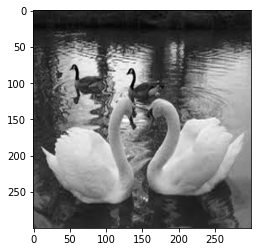

In [25]:
plt.imshow(train_swans[41][0], cmap = 'gist_gray')

In [0]:
train_sparrows = load_training_data("/content/sparrows")
train_sandpipers = load_training_data("/content/sandpipers")
train_pigeons = load_training_data("/content/pigeons")
train_peacocks = load_training_data("/content/peacocks")
train_parrots = load_training_data("/content/parrots")
train_crows = load_training_data("/content/crows")

In [0]:
train_data_all = train_swans + train_sparrows + train_sandpipers + train_pigeons + train_parrots +  train_crows + train_peacocks

In [0]:
trainImages = np.array([i[0] for i in train_data_all]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data_all])

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(7, activation = 'softmax'))

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [31]:
model.fit(trainImages, trainLabels, batch_size = 10, epochs = 15, verbose = 1)

Epoch 1/15
2240/2240 [==============================] - 335s 150ms/step - loss: 2.0097 - accuracy: 0.3719
Epoch 2/15
2240/2240 [==============================] - 335s 150ms/step - loss: 1.3871 - accuracy: 0.5228
Epoch 3/15
2240/2240 [==============================] - 338s 151ms/step - loss: 1.0271 - accuracy: 0.6344
Epoch 4/15
2240/2240 [==============================] - 342s 153ms/step - loss: 0.7360 - accuracy: 0.7429
Epoch 5/15
2240/2240 [==============================] - 346s 155ms/step - loss: 0.5429 - accuracy: 0.8027
Epoch 6/15
2240/2240 [==============================] - 345s 154ms/step - loss: 0.3757 - accuracy: 0.8687
Epoch 7/15
2240/2240 [==============================] - 347s 155ms/step - loss: 0.2659 - accuracy: 0.9062
Epoch 8/15
2240/2240 [==============================] - 347s 155ms/step - loss: 0.1756 - accuracy: 0.9446
Epoch 9/15
2240/2240 [==============================] - 342s 153ms/step - loss: 0.1406 - accuracy: 0.9536
Epoch 10/15
2240/2240 [=======================